# Notebook d'analyse statistique et détection d'insights

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


pd.set_option("display.max_columns", 50)

## A. Data

In [3]:
df = pd.read_csv(filepath_or_buffer="./data/train.csv", sep=",")

In [4]:
df.head(3)

,engagement,timestamp,language,feature1,feature2,followers,author,word_count,shared_url_count,shared_url_domain,is_reply,is_retweet,contains_video,contains_image,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V1000,V1001,V1002,V1003,V1004,V1005,V1006,V1007,V1008,V1009,V1010,V1011,V1012,V1013,V1014,V1015,V1016,V1017,V1018,V1019,V1020,V1021,V1022,V1023,V1024
0,15,1655784230254,en,73,0,696,bd20432d80dfe4825a7a106312bda52e,18,0,NaN,False,False,False,True,0.010209,-0.000056,-0.000666,0.013120,0.005126,0.001000,0.013217,0.086126,0.016478,0.002729,0.043539,...,-0.000021,0.000277,0.019307,0.010259,0.044691,0.028100,0.023241,0.007108,5.303996e-05,0.000707,0.056702,0.008670,-0.000175,-0.001363,0.001299,0.066302,-0.002309,0.006296,-0.003366,0.055845,0.002813,0.030930,0.040009,0.017094,0.047829
1,91007,1655599613254,en,100,5,17526,71e2ecc6cc1d6515a6b122fab4c63bfc,15,0,NaN,False,False,False,False,0.029649,-0.000008,0.000608,0.013611,0.019315,0.010607,0.015242,0.075310,0.002251,0.006700,0.030039,...,-0.000573,0.000073,0.005532,0.007983,0.038882,0.047019,0.020805,0.001928,-1.218344e-07,0.007011,0.024635,0.017761,-0.000891,-0.001432,0.001263,0.020109,0.014174,0.019271,0.011605,-0.001049,0.018731,0.008732,0.034822,0.042102,0.020760
2,3,1655788872254,en,0,-5,239,2a9109f38d90a2a96e284a07c1a57e9b,8,0,NaN,True,False,False,False,0.036175,-0.000053,0.046600,0.006191,-0.002715,0.004963,-0.001282,0.067732,-0.000098,0.012590,0.042196,...,0.003328,0.001767,0.024704,0.012422,0.020508,0.010454,0.005297,0.012263,4.043737e-02,-0.000712,-0.000318,0.110239,0.003467,-0.002236,0.000999,0.069541,0.094191,-0.002353,0.030343,0.004930,0.000064,0.007801,0.006239,0.020304,0.032962


## B. Analyse descriptive de la target

<Axes: ylabel='Frequency'>

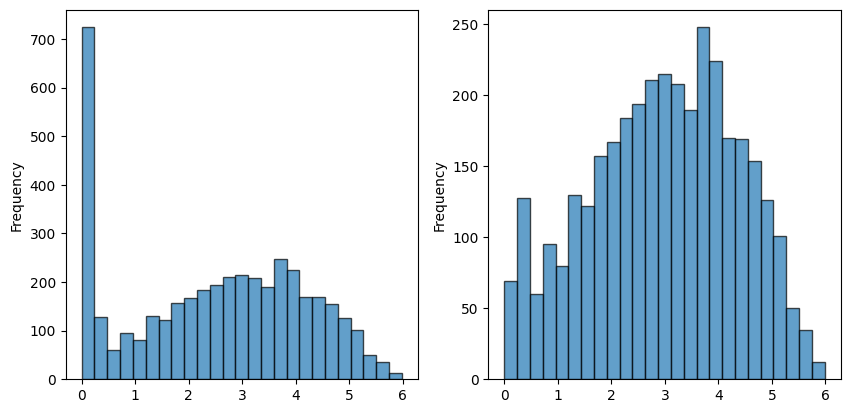

In [5]:
plt.figure(figsize=(10, 4.8))

plt.subplot(121)

(
    df["engagement"]  # On en suppose une distribution log-normale
    .apply(np.log10)
    .replace(-np.inf, 0)
    .plot(kind="hist", bins=25, edgecolor="black", alpha=0.7)
)

plt.subplot(122)

(
    df["engagement"]  # On en suppose une distribution log-normale
    .apply(np.log10)
    .replace(-np.inf, np.nan)  # To remove them
    .plot(kind="hist", bins=25, edgecolor="black", alpha=0.7)
)

## C. Analyse des types

todo : 

* add corr
* penser à remettre le describe dans le numérique
* retirer les outliers

In [6]:
{key: val for key, val in df.dtypes.to_dict().items() if "V" not in key}

{'engagement': dtype('int64'),
 'timestamp': dtype('int64'),
 'language': dtype('O'),
 'feature1': dtype('int64'),
 'feature2': dtype('int64'),
 'followers': dtype('int64'),
 'author': dtype('O'),
 'word_count': dtype('int64'),
 'shared_url_count': dtype('int64'),
 'shared_url_domain': dtype('O'),
 'is_reply': dtype('bool'),
 'is_retweet': dtype('bool'),
 'contains_video': dtype('bool'),
 'contains_image': dtype('bool')}

3 types présents : 

* Textuelles (Objets)
* Indicatrices (Booléens)
* Numériques

## D. Analyse statistique des variables textuelles

In [7]:
object_cols = ["language", "author", "shared_url_domain"]

In [8]:
for col in object_cols:
    print(df[col].value_counts())
    print("\n"*2 + "="*40 + "\n")

language
en    4154
Name: count, dtype: int64



author
d232857c1754d01abbf53c3c4b0f2d94    11
cb2ce958fb272bc7ae93e3ef91772708     8
088b8d41f18b6b5aa6fb2bd3928181fc     8
b2b7a291ec4f52ec8ecfc829294fb985     7
a785c535acc57b0dc44a479d3a26766e     7
                                    ..
25dcf3ac72bc08eea7b29ca9eb7006fe     1
31d6af429f624cdd29fc1b39c5db8141     1
df17b570fc73f82f3f4b1934ff187175     1
c49208b6a7f16814e80169aa1071539a     1
b196ecf70bc80493034694d6b3c28592     1
Name: count, Length: 3903, dtype: int64



shared_url_domain
http://youtube.com/                   27
http://sumall.com/                    19
http://fllwrs.com/                    10
http://onlyfans.com/                   9
http://thehill.com/                    8
                                      ..
http://interestingengineering.com/     1
http://esquire.com/                    1
http://theepochtimes.com/              1
http://devinedestinies.com/            1
http://gleam.io/                       1
Nam

On observe que le langage est constant : variable décorrélée de la target

### a. Analyse de l'auteur (author)

En tout, il y a 176/3903 auteurs (4.5%) qui reviennent plus d'une fois.


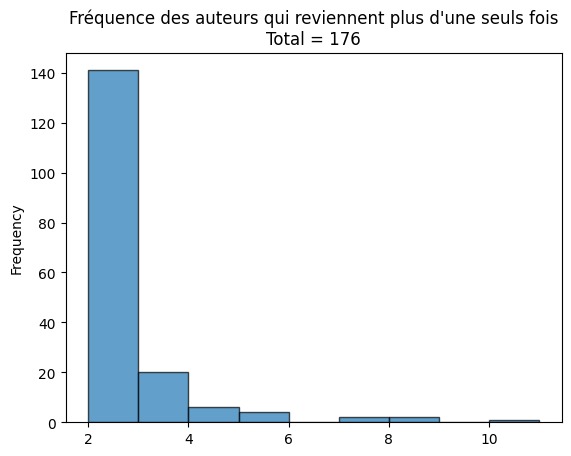

In [9]:
author_freq = df["author"].value_counts()

author_freq_sup_1 = author_freq[author_freq > 1]
count_author_sup_1 = author_freq[author_freq > 1].count()

author_freq_sup_1.plot(kind="hist", bins=max(author_freq)-2, edgecolor="black", alpha=0.7)

plt.title(f"Fréquence des auteurs qui reviennent plus d'une seuls fois\nTotal = {count_author_sup_1}")

print(f"En tout, il y a {count_author_sup_1}/{author_freq.shape[0]} auteurs ({count_author_sup_1/author_freq.shape[0]*100:.1f}%) qui reviennent plus d'une fois.")

### b. Analyse de l'URL (shared_url_domain)

i) Valeus manquantes

In [10]:
nb_na_urls = df["shared_url_domain"].isna().sum()
print(f"{nb_na_urls}/{df.shape[0]} urls vides ({nb_na_urls/df.shape[0]*100:.1f}%)")

3760/4154 urls vides (90.5%)


En effet :

In [11]:
df["shared_url_count"].value_counts()

shared_url_count
0    3760
1     235
2     151
3       5
4       3
Name: count, dtype: int64

Ou en %

In [12]:
df["shared_url_count"].value_counts() / len(df) * 100

shared_url_count
0    90.515166
1     5.657198
2     3.635051
3     0.120366
4     0.072220
Name: count, dtype: float64

ii) Valeurs multiples

In [13]:
df[df["shared_url_count"] > 1][["shared_url_count", "shared_url_domain"]]

,shared_url_count,shared_url_domain
13,2,http://sumall.com/
14,4,http://shelterbuddy.com/
42,2,http://youtube.com/
43,2,http://sumall.com/
132,2,http://sheldrickwildlifetrust.org/
...,...,...
3956,3,http://justfor.fans/
3986,2,http://sandyhookpromise.org/
4055,2,http://amazon.com/
4098,2,http://ebay.com/


On n'a donc qu'un seul url fournit même lorsqu'il y en avait plusieurs dans le tweet

iii) analyse du formattage

In [14]:
(
    df["shared_url_domain"]
    .dropna()
    .apply(lambda x: "http://" in x)
    .astype(str)
    .value_counts()
)

shared_url_domain
True    394
Name: count, dtype: int64

Tous contiennent ```http://```

In [15]:
url_split = (
    df["shared_url_domain"]
    .dropna()
    .apply(lambda x: x[7:-1].split("."))
    .apply(pd.Series)
)

url_split

,0,1,2
7,nbcnews,com,NaN
9,like17subs,com,NaN
13,sumall,com,NaN
14,shelterbuddy,com,NaN
19,nytimes,com,NaN
...,...,...,...
4106,cnn,com,NaN
4110,ko-fi,com,NaN
4142,theneweuropean,co,uk
4148,waynedupree,com,NaN


iv) analyse des extensions

In [16]:
url_split[[1, 2]].fillna("NaN").value_counts()

1         2  
com       NaN    314
tv        NaN     14
co        uk      12
org       NaN      9
co        NaN      8
com       au       4
fans      NaN      4
gov       NaN      3
net       NaN      3
news      NaN      2
info      NaN      2
eu        NaN      2
me        NaN      1
pw        NaN      1
nl        NaN      1
rocks     NaN      1
site      NaN      1
media     NaN      1
al        NaN      1
live      NaN      1
la        NaN      1
jp        NaN      1
it        NaN      1
ca        NaN      1
gov       au       1
es        NaN      1
delivery  NaN      1
com       vn       1
io        NaN      1
Name: count, dtype: int64

In [17]:
1 - (314+14+12+9+8+4+4+3+3+2+2+2)/394

0.043147208121827374

In [18]:
url_split[[1, 2]].fillna("NaN").shape

(394, 2)

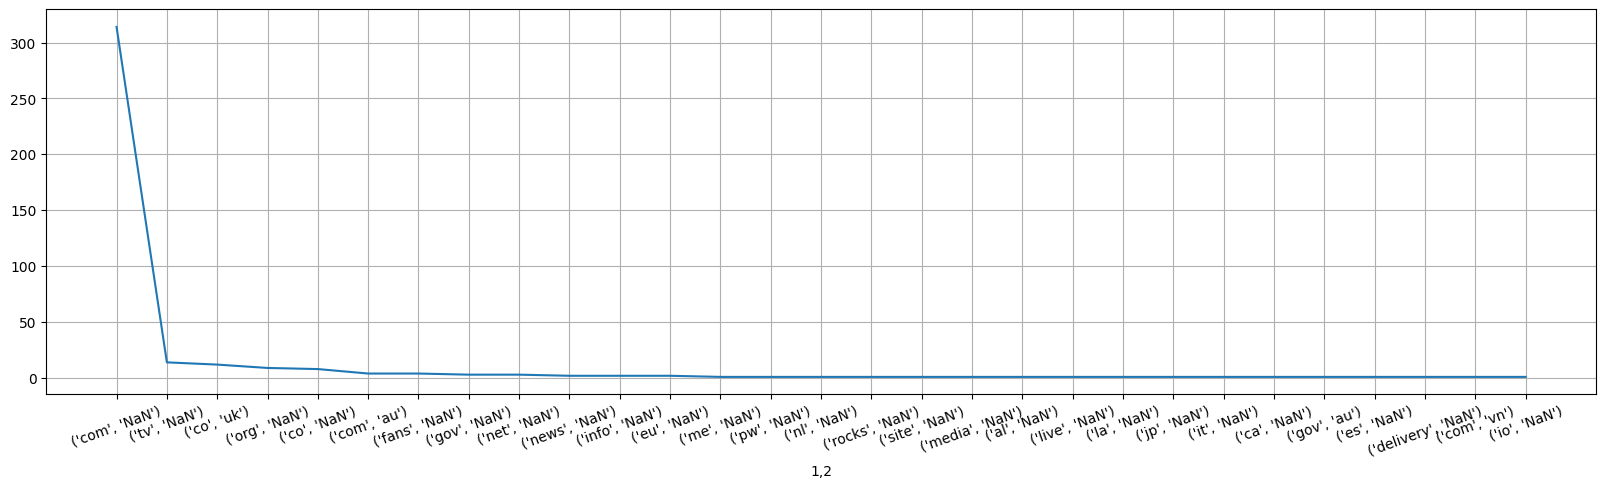

In [19]:
plt.figure(figsize=(20,5))

vc = url_split[[1, 2]].fillna("NaN").value_counts()
vc.plot()

plt.xticks(ticks=range(len(vc)), labels=vc.index, rotation=20)
plt.grid()

In [20]:
nb_sup_1_appearing = url_split[[1,2]].fillna("").value_counts()[url_split[[1,2]].fillna("").value_counts() > 1].shape[0]
nb_sup_2_appearing = url_split[[1,2]].fillna("").value_counts()[url_split[[1,2]].fillna("").value_counts() > 2].shape[0]
nb_unique = (url_split[1].fillna("") + url_split[2].fillna("")).nunique()

(
    f"{nb_sup_1_appearing} extensions ({nb_sup_1_appearing/nb_unique*100:.1f}%) apparaissent "
    f"plus d'une fois et {nb_sup_2_appearing} plus de deux fois ({nb_sup_2_appearing/nb_unique*100:.1f}%)."
)

"12 extensions (41.4%) apparaissent plus d'une fois et 9 plus de deux fois (31.0%)."

v) analyse des noms de domaines

In [21]:
url_split[0].value_counts()

0
youtube                   27
sumall                    19
fllwrs                    10
onlyfans                   9
thehill                    8
                          ..
interestingengineering     1
esquire                    1
theepochtimes              1
devinedestinies            1
gleam                      1
Name: count, Length: 246, dtype: int64

In [22]:
nb_sup_1_appearing = url_split[0].value_counts()[url_split[0].value_counts() > 1].shape[0]
nb_sup_2_appearing = url_split[0].value_counts()[url_split[0].value_counts() > 2].shape[0]
nb_domains = url_split[0].nunique()

(
    f"{nb_sup_1_appearing} extensions ({nb_sup_1_appearing/nb_domains*100:.1f}%) apparaissent "
    f"plus d'une fois et {nb_sup_2_appearing} plus de deux fois ({nb_sup_2_appearing/nb_domains*100:.1f}%)."
)

"45 extensions (18.3%) apparaissent plus d'une fois et 22 plus de deux fois (8.9%)."

Grand nombre d'extensions et de noms de domaines n'apparaissent que peu de fois -> binning

## E. Analyse statistique des valeurs booléennes

In [23]:
bool_cols = ["is_reply", "is_retweet", "contains_video", "contains_image"]

In [24]:
for col in bool_cols:
    subset = df[col].fillna("NaN")
    stats = pd.concat(
        [subset.value_counts(), (subset.value_counts()/len(df)).rename("prop")],
        axis=1,
    )

    print(stats)
    print("\nNb missing:", df[col].isna().sum())

    print("\n"*2 + "="*40 + "\n")

          count      prop
is_reply                 
False      3660  0.881078
True        494  0.118922

Nb missing: 0



            count  prop
is_retweet             
False        4154   1.0

Nb missing: 0



                count      prop
contains_video                 
False            3341  0.804285
True              813  0.195715

Nb missing: 0



                count      prop
contains_image                 
False            3235  0.778767
True              919  0.221233

Nb missing: 0





```is_retweet``` est toujours ```False``` donc est décorrélée de la target.

Les autres semblent pas trop déséquilibrées (>95% par exemple) donc on les conserve.

## F. Analyse statistique des variables numériques

In [25]:
numerical_cols = ["timestamp", "feature1", "feature2", "followers", "word_count", "shared_url_count"]

In [26]:
df.describe()

,engagement,timestamp,feature1,feature2,followers,word_count,shared_url_count,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,...,V1000,V1001,V1002,V1003,V1004,V1005,V1006,V1007,V1008,V1009,V1010,V1011,V1012,V1013,V1014,V1015,V1016,V1017,V1018,V1019,V1020,V1021,V1022,V1023,V1024
count,4154.000000,4.154000e+03,4154.000000,4154.000000,4.154000e+03,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,...,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000,4154.000000
mean,18726.554887,1.655731e+12,66.249639,-0.392393,6.597973e+05,19.148532,0.135773,0.011446,0.000948,0.011217,0.013305,0.009960,0.009363,0.011298,0.069072,0.012391,0.012139,0.046643,0.010333,0.003878,0.028061,0.015230,0.014270,0.024225,0.011406,...,0.002794,0.000648,0.015395,0.010108,0.034987,0.022350,0.026085,0.007923,0.005138,0.005920,0.006414,0.030732,0.001739,0.001621,0.001570,0.038129,0.029974,0.004309,0.010637,0.006204,0.008505,0.024089,0.031339,0.017123,0.028035
std,64231.470891,1.603249e+08,37.540495,3.574409,4.605977e+06,13.424655,0.453847,0.011011,0.003854,0.016993,0.014091,0.009281,0.013143,0.014102,0.029177,0.014390,0.015480,0.015952,0.011533,0.008309,0.019654,0.013552,0.011248,0.010809,0.016991,...,0.004806,0.001324,0.013863,0.007504,0.014406,0.012366,0.011582,0.012081,0.012166,0.008235,0.012290,0.027324,0.005684,0.007616,0.004031,0.022071,0.029056,0.010232,0.014692,0.011464,0.013577,0.014056,0.013766,0.009001,0.011679
min,0.000000,1.653377e+12,0.000000,-5.000000,0.000000e+00,0.000000,0.000000,-0.007769,-0.002177,-0.014520,-0.004261,-0.025661,-0.003307,-0.002372,-0.004508,-0.007566,-0.002433,-0.000810,-0.005024,-0.005283,-0.001547,-0.006471,-0.008644,-0.001576,-0.002115,...,-0.016346,-0.005310,-0.005261,-0.002100,-0.001659,-0.005172,-0.007426,-0.004803,-0.002309,-0.003818,-0.008559,-0.002866,-0.004626,-0.004487,-0.006391,-0.006560,-0.004595,-0.004682,-0.005941,-0.002210,-0.002309,-0.009563,-0.002768,-0.005994,-0.016116
25%,12.000000,1.655741e+12,31.000000,-5.000000,8.140000e+02,9.000000,0.000000,0.003083,-0.000026,0.000402,0.003369,0.003769,0.002074,0.000437,0.054661,0.003672,0.002448,0.036147,0.003074,0.000069,0.012617,0.006210,0.006826,0.016581,-0.000505,...,0.000234,0.000072,0.004629,0.005310,0.025618,0.013243,0.017995,0.001321,-0.000424,0.000035,-0.000732,0.008974,-0.000523,-0.001478,0.000611,0.022121,0.006490,-0.000958,-0.000103,0.000451,0.000345,0.014675,0.022003,0.011188,0.020601
50%,486.000000,1.655776e+12,84.000000,0.000000,5.132000e+03,15.000000,0.000000,0.009228,-0.000009,0.004902,0.008821,0.009242,0.004841,0.007205,0.078820,0.008677,0.006793,0.048786,0.006877,0.001166,0.022682,0.011655,0.011920,0.023471,0.004005,...,0.001894,0.000414,0.012809,0.009315,0.036643,0.021239,0.025750,0.004179,0.000233,0.003546,0.001713,0.021814,-0.000267,-0.000930,0.000918,0.038446,0.019143,0.000636,0.006750,0.002063,0.003551,0.022966,0.031105,0.016338,0.028928
75%,6821.000000,1.655788e+12,100.000000,0.000000,4.926125e+04,27.000000,0.000000,0.017111,0.000107,0.016622,0.018633,0.015284,0.010108,0.017069,0.090126,0.015283,0.015081,0.058534,0.012506,0.003883,0.041887,0.020343,0.018543,0.031312,0.015588,...,0.003972,0.000873,0.022864,0.013640,0.045392,0.029791,0.033610,0.009105,0.003618,0.008829,0.008627,0.049121,0.001148,0.001000,0.001444,0.051680,0.052536,0.005084,0.016422,0.005641,0.010064,0.031536,0.040640,0.022207,0.036008
max,970456.000000,1.655790e+12,100.000000,5.000000,9.350486e+07,66.000000,4.000000,0.062851,0.080929,0.239115,0.092428,0.075337,0.094004,0.098331,0.124208,0.093653,0.107693,0.088144,0.074180,0.120729,0.102368,0.1103

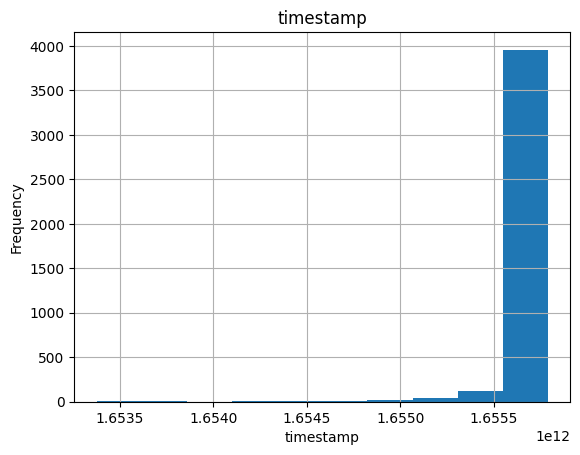

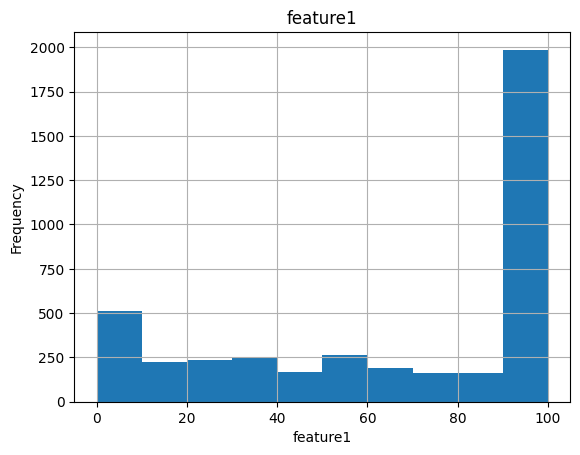

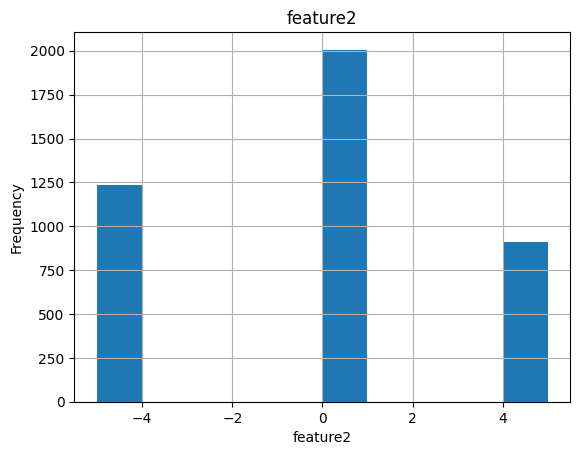

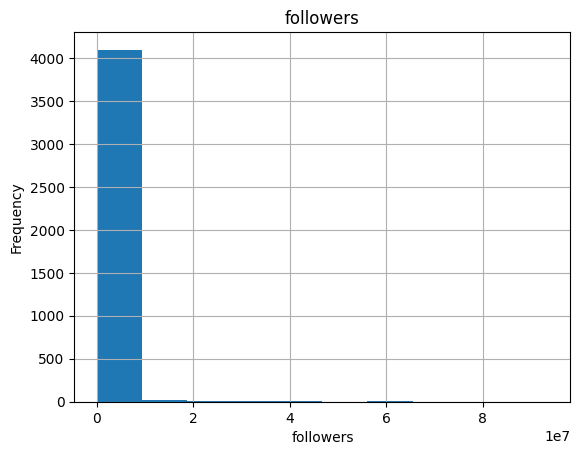

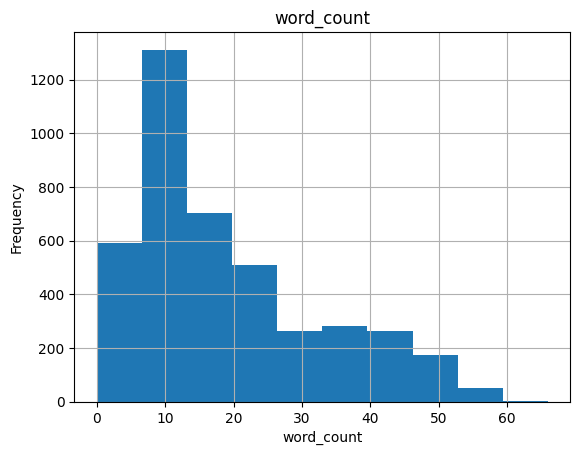

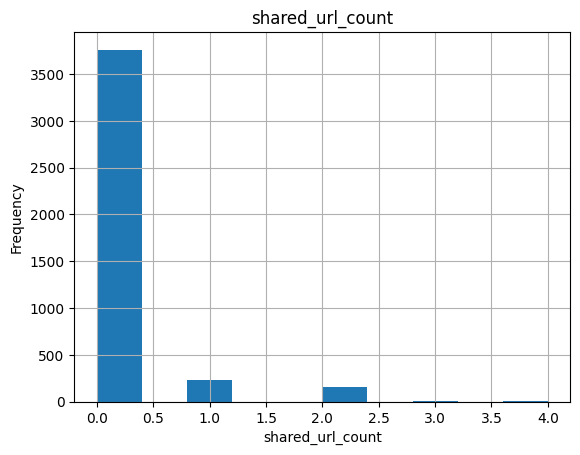

In [27]:
for col in numerical_cols:
    df[col].plot(kind="hist")
    plt.xlabel(col)
    plt.title(col)
    plt.grid()
    plt.show()

On recherche des distributions équilibrées.

* feature1 et feature2 sont plutôt équilibrée
* 
* 

<Axes: ylabel='Frequency'>

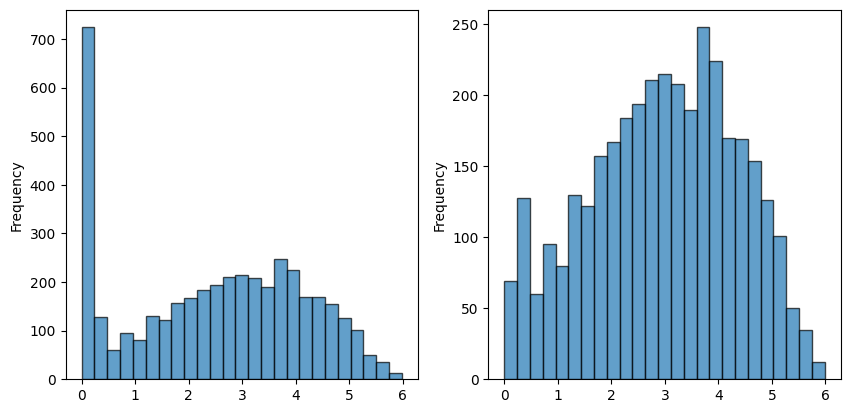

In [28]:
plt.figure(figsize=(10, 4.8))

plt.subplot(121)

(
    df["engagement"]  # On en suppose une distribution log-normale
    .apply(np.log10)
    .replace(-np.inf, 0)
    .plot(kind="hist", bins=25, edgecolor="black", alpha=0.7)
)

plt.subplot(122)

(
    df["engagement"]  # On en suppose une distribution log-normale
    .apply(np.log10)
    .replace(-np.inf, np.nan)  # To remove them
    .plot(kind="hist", bins=25, edgecolor="black", alpha=0.7)
)

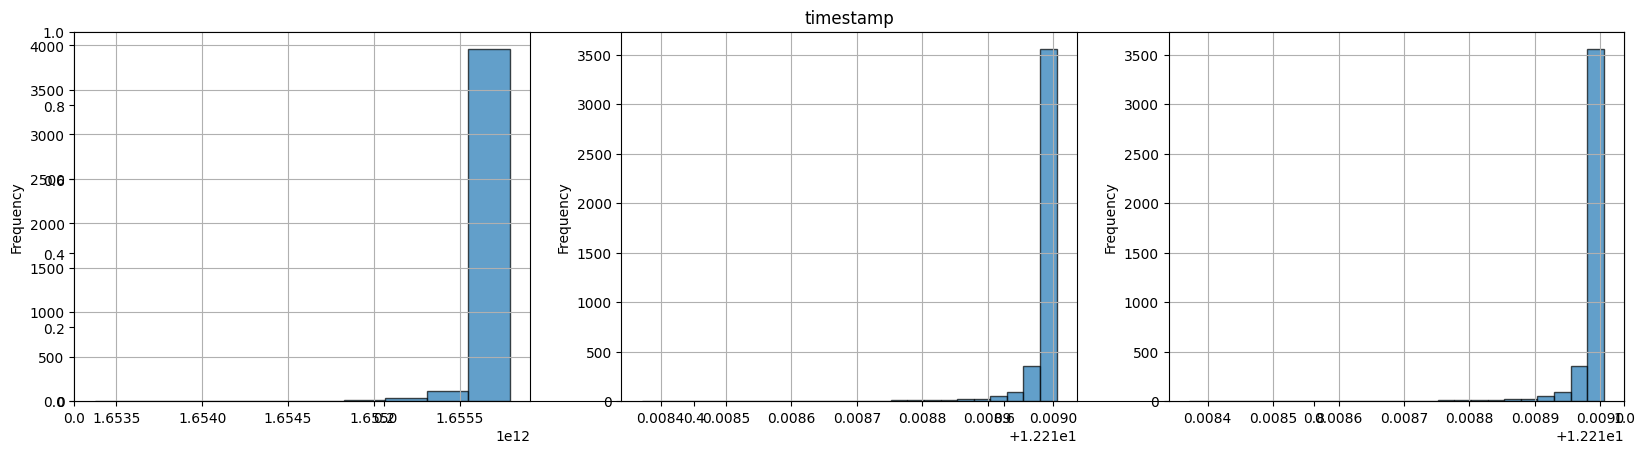

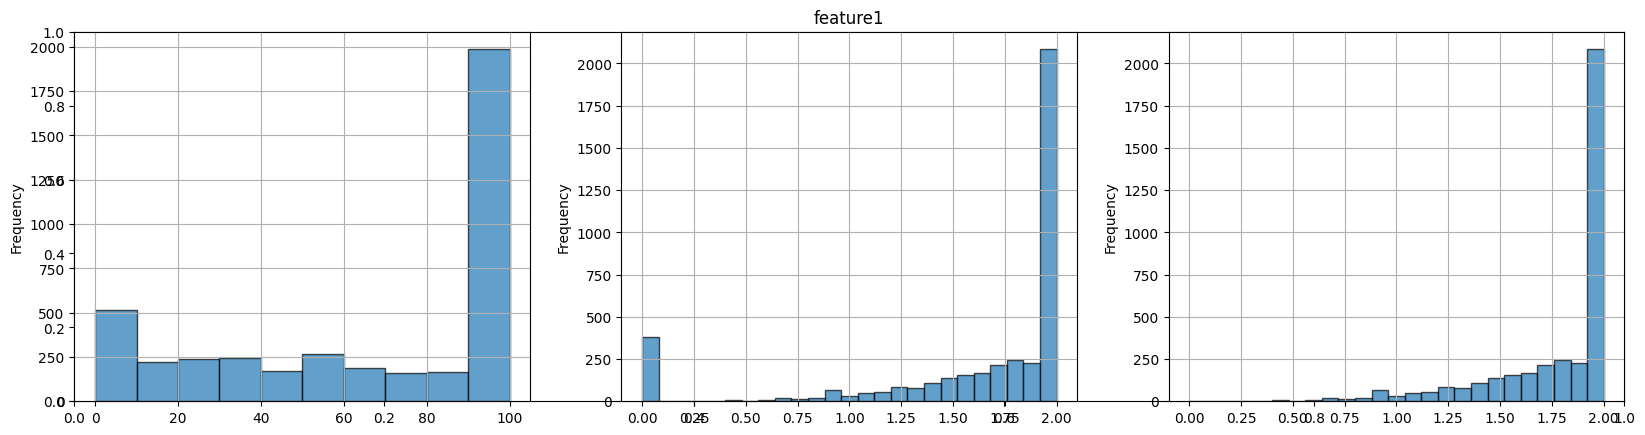

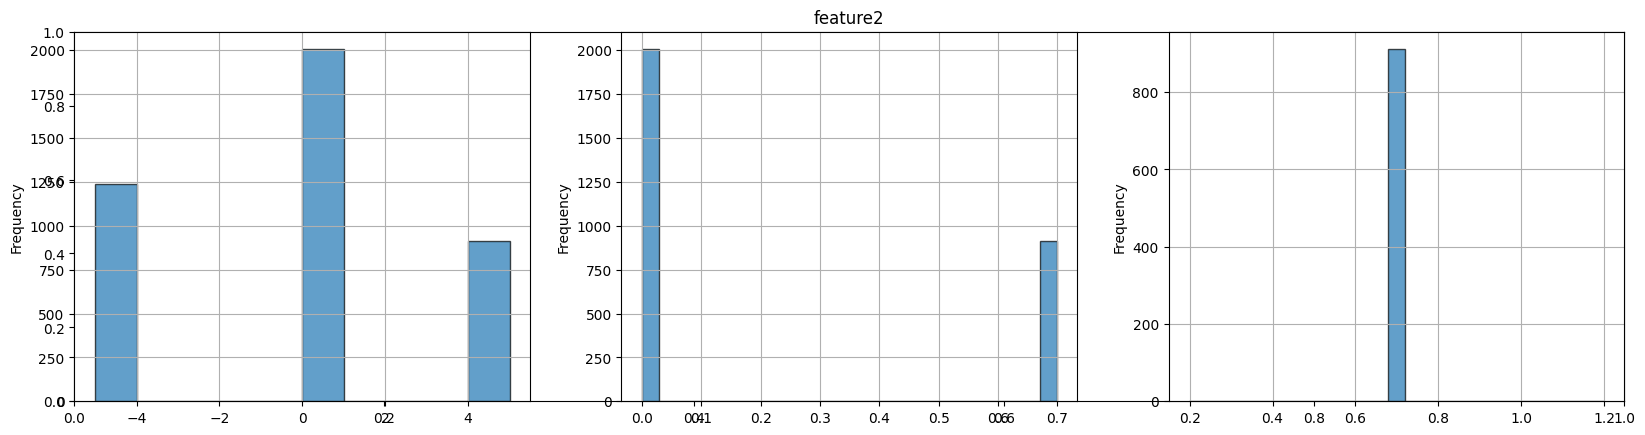

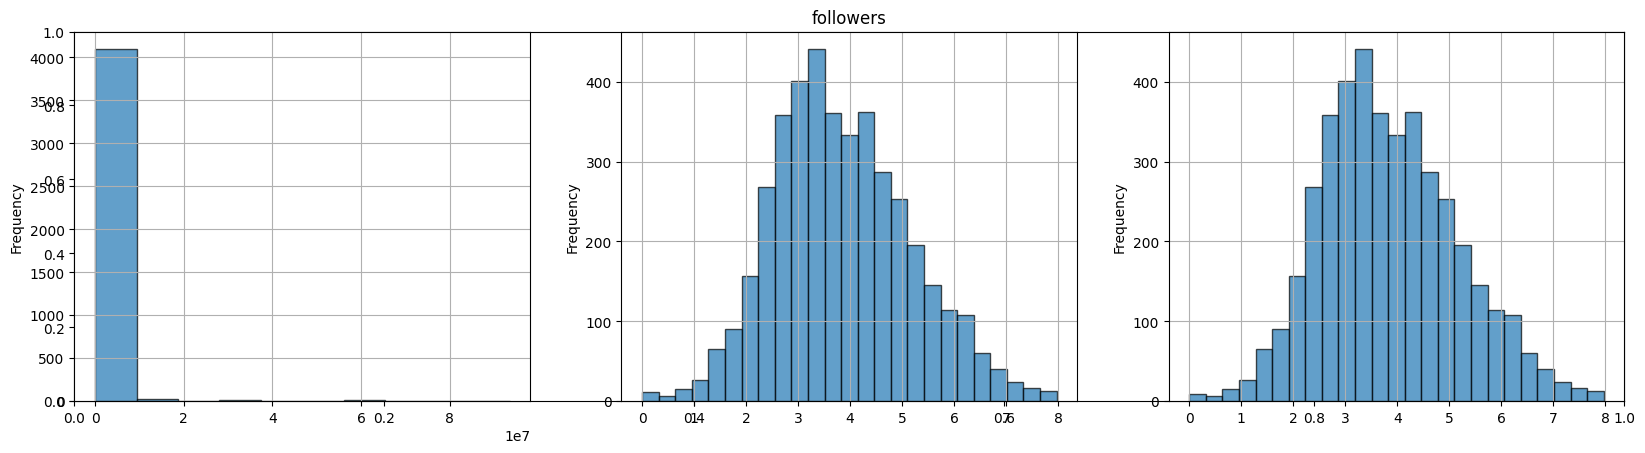

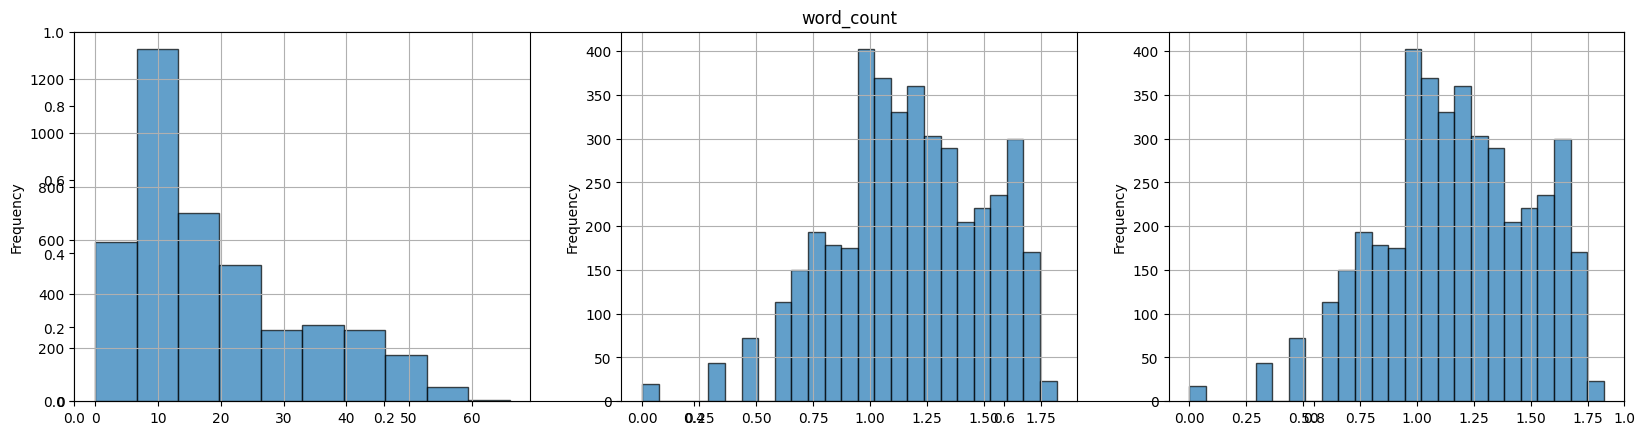

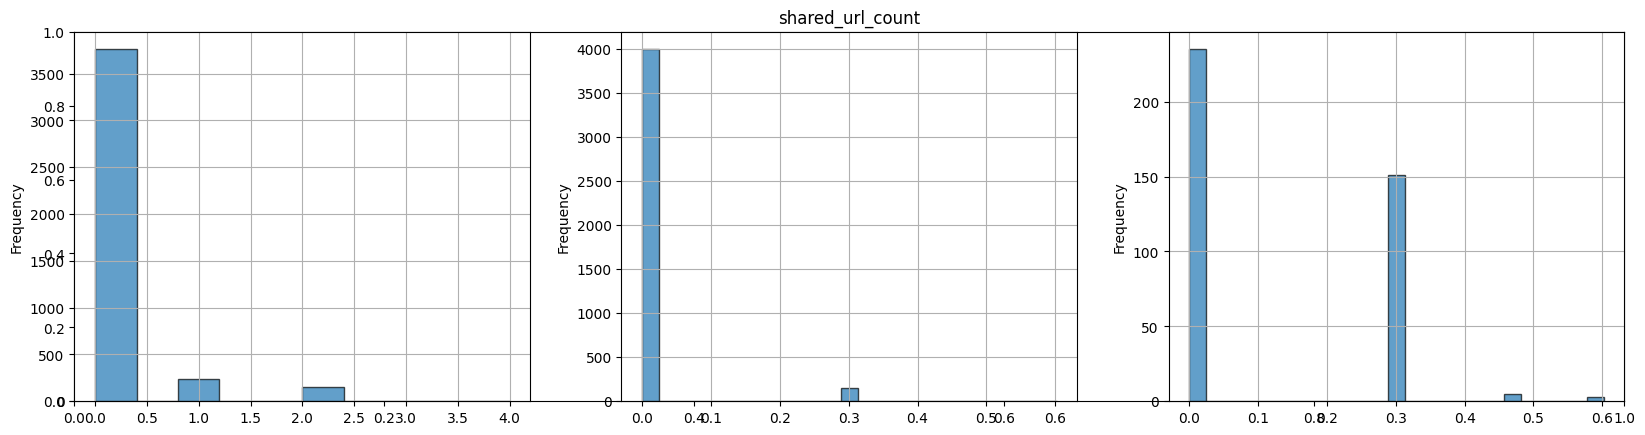

In [29]:
for col in numerical_cols:
    plt.figure(figsize=(20, 4.8))
    plt.title(col)

    plt.subplot(131)

    df[col].plot(kind="hist", edgecolor="black", alpha=0.7)
    plt.grid()

    plt.subplot(132)

    (
        df[col]  # On en suppose une distribution log-normale
        .apply(np.log10)
        .replace(-np.inf, 0)
        .plot(kind="hist", bins=25, edgecolor="black", alpha=0.7)
    )
    plt.grid()

    plt.subplot(133)

    (
        df[col]  # On en suppose une distribution log-normale
        .apply(np.log10)
        .replace(-np.inf, np.nan)
        .plot(kind="hist", bins=25, edgecolor="black", alpha=0.7)
    )
    plt.grid()

    plt.show()


On observe que 
* ```shared_url_count``` a de nombreuses valeurs nulles. D'une part c'est une variable qui explique peu (très déséquilibrée) d'autre part, elle perdrait à être log simplement. On pourrait considérer deux approches : 
  * Transformer en 2 variables : Booléenne ```is_shared_url``` et une transformation log de shared_url > 0.
  * Appliquer log10(.+1).
* De même, ```feature1``` présente un profil assez déséquilibré. On peut imaginer ajouter ```feature1_is_max``` et un retrait simple des valeurs proches de 100 (ses autres valeurs étant plutôt bien distribuées). Une analyse ci-dessous montre qu'un seuil à 100 strictement suffit. 
* ```feature2``` est plutôt équilibrée.
* ```followers``` et ```word_count``` réagissent bien à une transformation log (notamment parce que leurs valeurs nulles sont rares : 2 chacuns; qui correspondent plus à des outliers (**à retirer.**))
* ```timestamp``` contient beaucoup d'information. On peut en tirer le jour de la semaine, le mois, l'heure de post. Aussi, on peut lui appliquer une transformation $log_{10}(x - ||x||_\infty)$

i) Feature 1

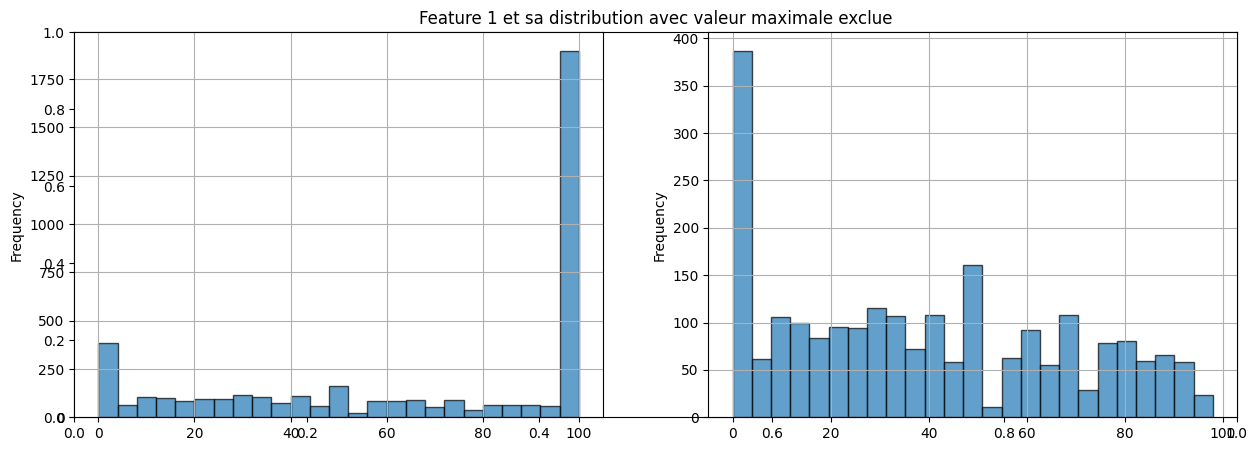

In [30]:
plt.figure(figsize=(15, 5))
plt.title("Feature 1 et sa distribution avec valeur maximale exclue")

plt.subplot(121)
df["feature1"].plot(kind="hist", bins=25, edgecolor="black", alpha=0.7)
plt.grid()

plt.subplot(122)
df[df["feature1"] < 100]["feature1"].plot(kind="hist", bins=25, edgecolor="black", alpha=0.7)
plt.grid()

ii) followers & word_count

In [31]:
null_values_followers = df[df["followers"] == 0]["followers"].shape[0]
null_values_word_count = df[df["word_count"] == 0]["word_count"].shape[0]
f"{null_values_followers} followers nuls et {null_values_word_count} word_count nuls."

'2 followers nuls et 2 word_count nuls.'

In [32]:
df[df["followers"] == 0]

,engagement,timestamp,language,feature1,feature2,followers,author,word_count,shared_url_count,shared_url_domain,is_reply,is_retweet,contains_video,contains_image,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V1000,V1001,V1002,V1003,V1004,V1005,V1006,V1007,V1008,V1009,V1010,V1011,V1012,V1013,V1014,V1015,V1016,V1017,V1018,V1019,V1020,V1021,V1022,V1023,V1024
738,0,1655789237254,en,100,0,0,94373a3066c17c0b106d923bbda817f0,9,0,NaN,False,False,False,False,0.000271,-0.000027,-0.000521,0.013450,0.029467,0.001511,0.008941,0.003848,0.004864,-0.000556,0.038485,...,-0.000307,0.000030,0.026138,0.007417,0.021995,0.009714,0.042769,-0.000433,0.002072,0.011287,-0.002881,-0.000338,0.001311,-0.001751,0.004229,0.029844,0.004871,0.000963,0.009439,-0.000677,0.001210,0.011380,0.004376,0.031328,0.018295
3380,0,1655789210254,en,10,0,0,25443abb9d47405d7740a7a6786ab261,11,0,NaN,False,False,False,False,0.051567,-0.000116,0.087242,0.000178,0.022803,0.000110,0.011543,0.040476,0.002277,0.003332,0.001498,...,0.000091,0.000674,0.004255,0.008496,0.056884,0.024584,0.032810,0.008019,0.002408,-0.001604,-0.004482,0.026486,-0.000561,-0.002283,0.000777,0.059723,0.042563,-0.001393,0.042988,0.002104,0.001652,0.005436,0.032368,0.007386,0.039482


Sans followers, l'engagement est nul.

In [33]:
df[df["word_count"] == 0]

,engagement,timestamp,language,feature1,feature2,followers,author,word_count,shared_url_count,shared_url_domain,is_reply,is_retweet,contains_video,contains_image,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V1000,V1001,V1002,V1003,V1004,V1005,V1006,V1007,V1008,V1009,V1010,V1011,V1012,V1013,V1014,V1015,V1016,V1017,V1018,V1019,V1020,V1021,V1022,V1023,V1024
454,0,1655789209254,en,0,0,21314,6caf9e9e68fb7072c4cfaff1d5055fa8,0,0,NaN,False,False,False,False,0.019200,0.000038,0.005733,0.007460,0.008052,0.003137,0.029065,0.012547,0.017912,-0.000374,0.028958,...,0.000210,-0.000155,0.039041,0.002135,0.021234,0.019770,0.050971,0.013596,-0.000394,0.002807,0.004202,0.010458,0.004405,0.000696,0.000365,0.037014,0.023797,-0.000512,0.011621,0.006821,0.003981,0.033100,0.048541,0.004333,0.012601
927,2,1655789519254,en,0,0,182,8171bd03c4121f63090474f41e29cdfc,0,0,NaN,False,False,False,False,-0.004673,0.002705,0.001062,0.008949,0.029729,0.002947,0.019530,0.012229,0.003289,0.085421,0.024707,...,0.003206,0.000802,0.018070,0.013074,0.046459,0.002037,0.034926,0.008765,0.009923,0.009424,-0.001768,0.007651,-0.000235,-0.001457,0.000941,0.032893,0.051782,-0.001535,-0.001106,0.017215,0.000294,0.003789,0.012012,0.025540,0.006859


Sans mots, peu d'engagement (moins de 2)

iii) shared_url_count

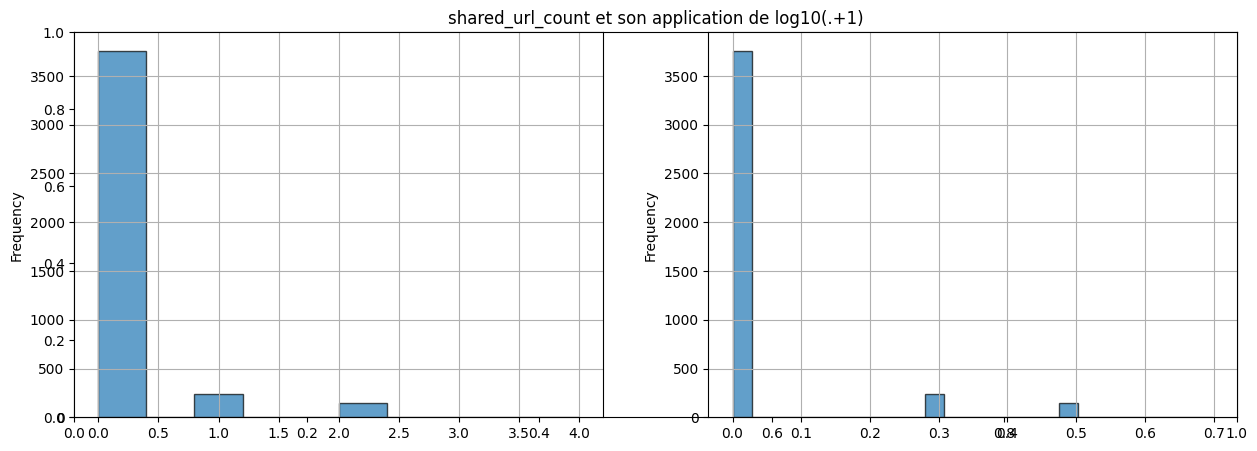

In [34]:
plt.figure(figsize=(15, 5))
plt.title("shared_url_count et son application de log10(.+1)")

plt.subplot(121)

df["shared_url_count"].plot(kind="hist", edgecolor="black", alpha=0.7)
plt.grid()

plt.subplot(122)

(
    df["shared_url_count"]
    .apply(lambda x: np.log10(x+1))
    .plot(kind="hist", bins=25, edgecolor="black", alpha=0.7)
)
plt.grid()

dans un premier temps on va donc suivre la 1ère approche

iv) timestamp

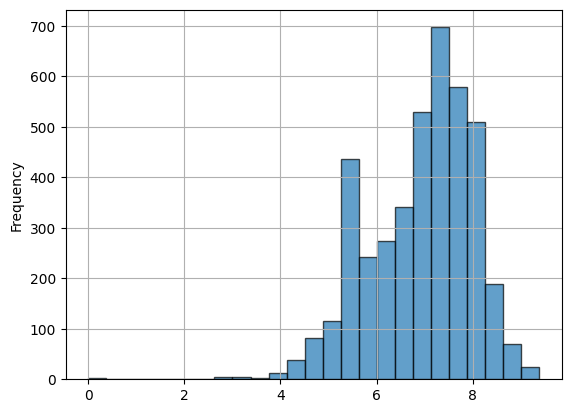

In [35]:
max_timestamp = df["timestamp"].max()

(
    df["timestamp"]
    .apply(lambda x: np.log10(max_timestamp + 1 - x))
    .plot(kind="hist", bins=25, edgecolor="black", alpha=0.7)
)
plt.grid()

In [36]:
timestamp_datetime_series = pd.to_datetime(df["timestamp"], unit='ms')

datetime_month_series = timestamp_datetime_series.dt.month
datetime_day_of_week_series = timestamp_datetime_series.dt.dayofweek
datetime_hour_series = timestamp_datetime_series.dt.hour

In [37]:
pd.concat(
    [timestamp_datetime_series.dt.date.value_counts(), (timestamp_datetime_series.dt.date.value_counts() / len(df)).rename("prop")],
    axis=1,
)

,count,prop
timestamp,,
2022-06-21,2358,0.567646
2022-06-20,1272,0.306211
2022-06-19,274,0.065961
2022-06-18,87,0.020944
2022-06-17,46,0.011074
2022-06-16,28,0.006740
2022-06-15,23,0.005537
2022-06-14,10,0.002407
2022-06-13,10,0.002407


toutes les dates sont comprises entre le 24/05 et le 21/06 de l'année 2022. De plus, les dates sont très déséquilibrées : 56% des données proviennent du même jour. 
L'approche par l'heure de post est compromise...

v) embedding (V.)


In [38]:
V_cols = [col for col in df.columns if "V" in col]

Variance expliquée cumulée pour 10 composantes : 0.31102027297986207
Variance expliquée cumulée pour 20 composantes : 0.3764989435624249
Variance expliquée cumulée pour 50 composantes : 0.4985191613921122
Variance expliquée cumulée pour 100 composantes : 0.6164153695551646
Variance expliquée cumulée pour 200 composantes : 0.751455191991985
Variance expliquée cumulée pour 500 composantes : 0.9269896202885433
Variance expliquée cumulée pour 1000 composantes : 0.9996978521472626


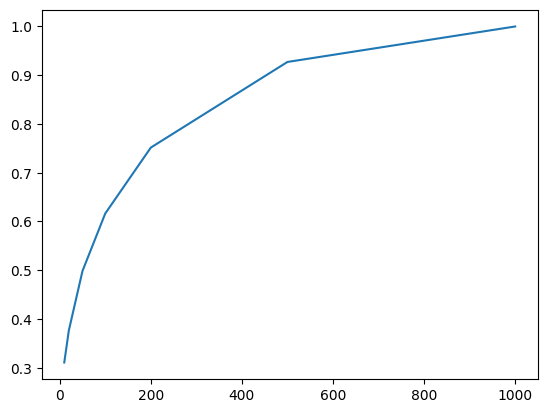

In [39]:
n_components_array = [10, 20, 50, 100, 200, 500, 1000]
variances = []

for n_components in n_components_array:
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(df[V_cols])

    print(f"Variance expliquée cumulée pour {n_components} composantes :", pca.explained_variance_ratio_.sum())

    variances.append(pca.explained_variance_ratio_.sum())

plt.plot(n_components_array, variances)